데이터 출처 : https://www.kaggle.com/uciml/pima-indians-diabetes-database

############ 데이터 컬럼 설명 ############
Pregnancies: 임신 횟수
Glucose: 포도당 부하 검사 수치
BloodPressure: 혈압(mm Hg)
SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
Insulin: 혈청 인슐린(mu U/ml)
BMI: 체질량지수(체중(kg)/키(m))^2
DiabetesPedigreeFunction: 당뇨 내력 가중치 값
Age: 나이
Outcome: 클래스 결정 값(0 또는 1)

############ DOMAIN KNOWLEDGE ############
- 당뇨병 요인 -
약물 (당류 코르티코이드 등)을 투약 중인 경우
평소에 운동을 하지 않는 사람
이전에 공복혈당장애나 내당능장애를 진단 받았거나 당화혈색소가 5.7% 이상이었던 사람
중성지방이 높거나(> 250 mg/dL) 고밀도콜레스테롤이 낮은(< 35 mg/dL) 사람
심혈관 질환(뇌졸중, 관상동맥질환, 말초혈관질환)을 경험한 사람
※ 부모, 형제 중에 당뇨병을 가진 사람이 있는 경우
※ 임신성 당뇨병이 있었거나 4kg 이상의 아기를 분만한 여성
※ 혈압이 140/90 mmHg 이상이거나 항 고혈압 약물을 복용 중인 사람
※ 인슐린 저항성(고도 비만, 다낭성난소증후군, 흑색극세포증)이 있는 사람

############ 문제 파악 ############
outcome이 우리의 y 값이고 나머지는 x값이며 x값들을 받았을때 이 사람이 당뇨병에 걸렸는지 안걸렸는지
예측하는 문제이므로 분류 문제이다.

- PROCESS -
데이터 탐색 -> 데이터 전처리 -> 데이터 클러스터링 -> 모델링 -> 성능 평가

# 데이터 탐색

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import intelModule as imd

# intelModule은 자주쓰는 함수를 미리 만들어 놓은 클래스입니다.
im = imd.intelModule
df = pd.read_csv('./data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


우선 3개의 데이터를 뽑아봅니다. 이번 데이터는 전부 수치형이며 전처리할게 많이 없는 깔끔한 데이터 입니다.
데이터 분석의 입문용으로 시작하기 좋습니다.

In [30]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


자동 완성 기능을 편하게 쓰기위해 미리 변수에 데이터 컬럼명을 넣습니다.

In [31]:
pregnancies = "Pregnancies"
glucose = "Glucose"
bloodPressure = "BloodPressure"
skinThickness = "SkinThickness"
insulin = "Insulin"
bmi = "BMI"
diabetesPedigreeFunction = "DiabetesPedigreeFunction"
age = "Age"
outcome = "Outcome"

데이터를 살펴 봅니다. 전체 768개이며 평균값, 표준 편차, 최소값, 최대값을 살펴봅니다.

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


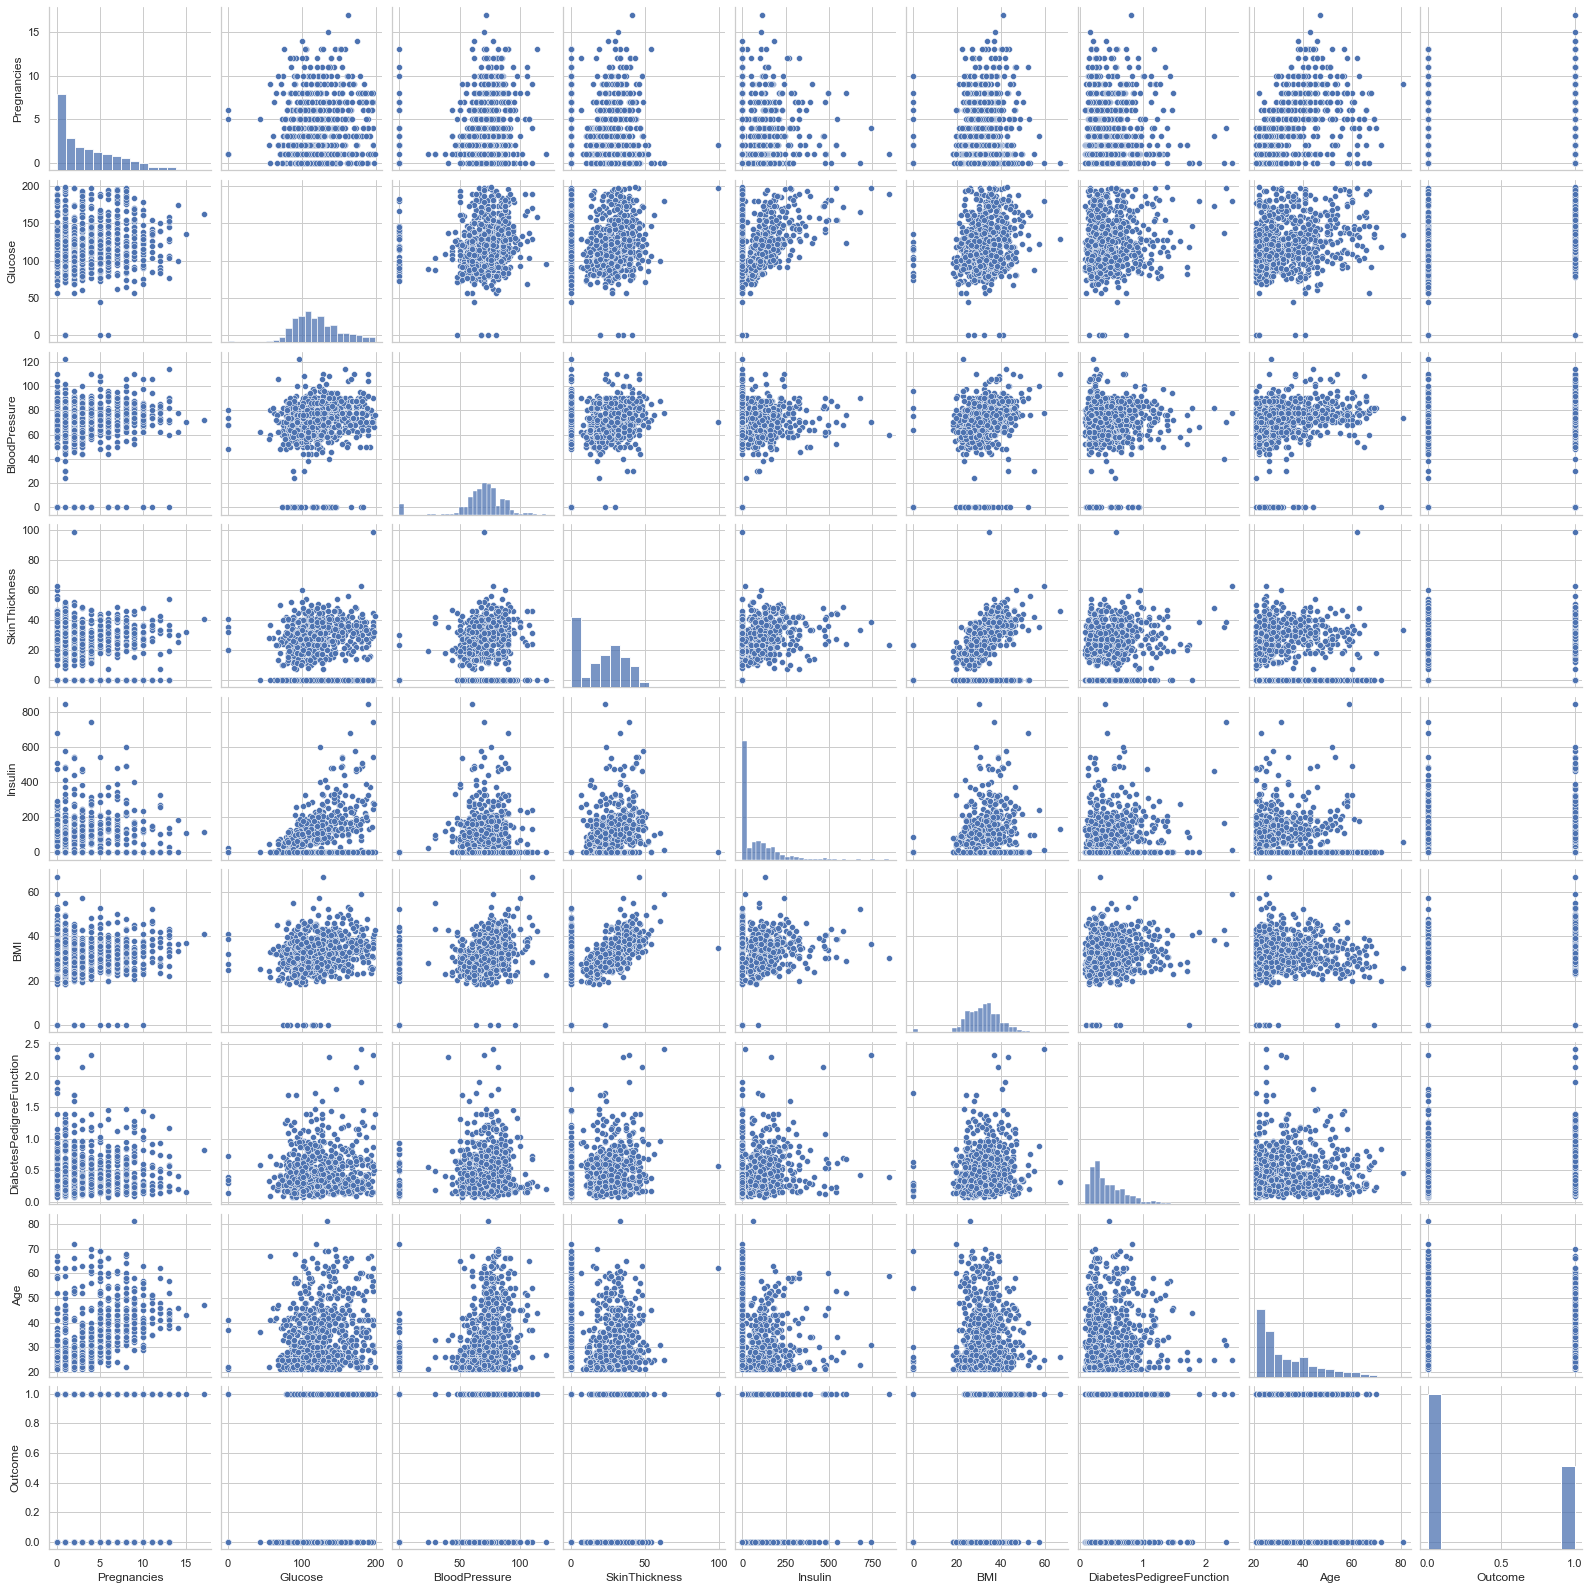

In [33]:
# 참조 : https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
# 혹시나 seaborn 버전이 안맞아서 에러가 난다면 참고하십시오.
sns.__version__
# seaborn 표 뒷배경을 화이트로 해야 글자가 잘 보입니다.
sns.set(style='whitegrid')
sns.pairplot(df)

우선 전체적으로 박스플롯을 찍어보고 어떤 변수들이 의미 있는지 제거해야할 아웃라이어들이 있는 변수들을 파악해봅시다.

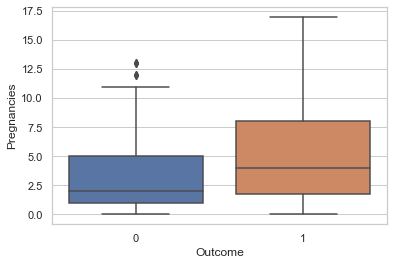

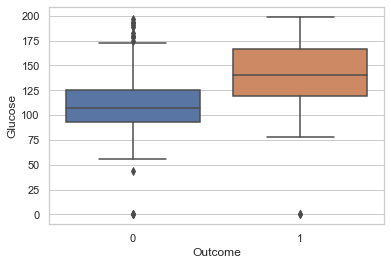

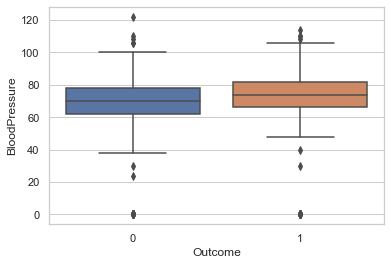

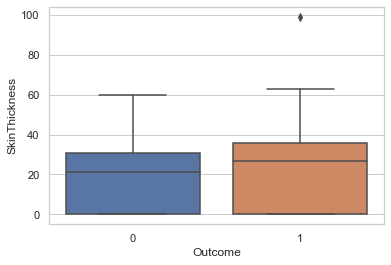

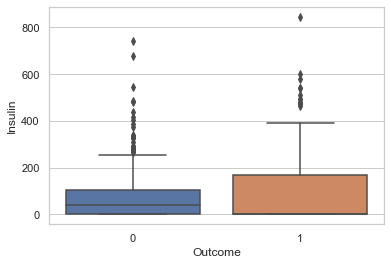

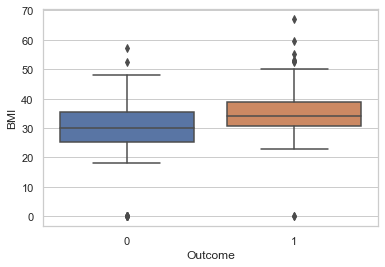

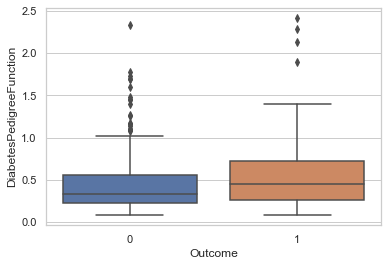

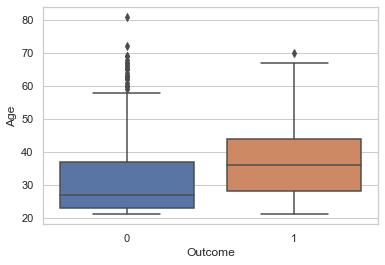

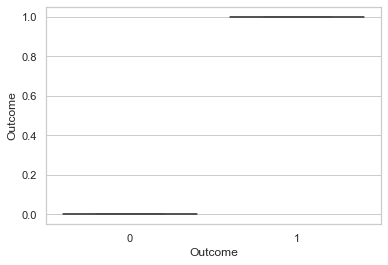

In [34]:
im.showBoxPlots(df, outcome)

히트맵을 찍어봅니다.
Glucose가 0.47로 가장 당뇨병에 영향을 끼친다고 볼 수 있겠습니다.

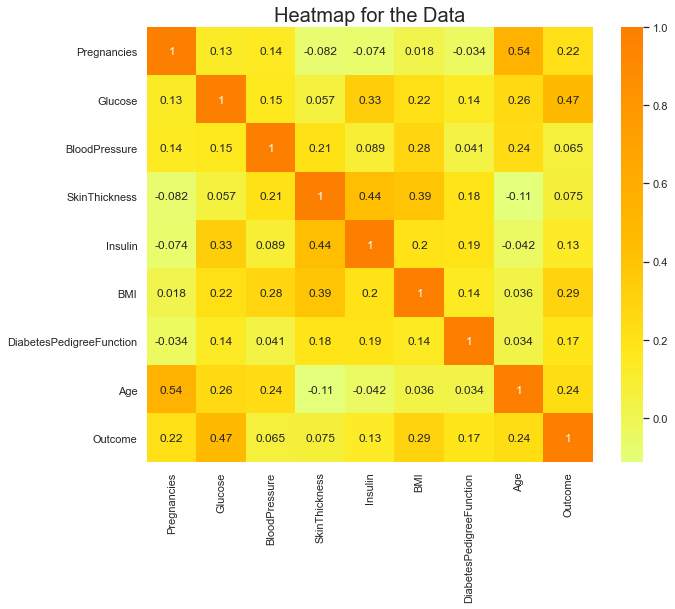

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.title('Heatmap for the Data', fontsize=20)
plt.show()

# 데이터 전처리

결측치가 있는지 한번 확인해 봅니다.
변수 모두 결측치가 없습니다.

In [36]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

임계값(Threshold)
애매한 값을 이분법으로 확실히 분류를 할 기준이 바로 임계값(Threshold)라고 합니다.
로지스틱 회귀 값을 이진 카테고리에 매핑(Mapping)하려면 분류 임계값(Classification Threshold, 결정 임계값이라고도 함)을 정의해야 합니다.
임계값보다 높은 값은 'true'를 나타내고 임계값보다 낮은 값은 'false'로 나타냅니다.
분류 임계값은 항상 0.5여야 한다고 생각하기 쉽지만 임계값은 문제에 따라 달라지므로 값을 조정해야 합니다.
이제 아웃라이어를 제거합니다. 아웃라이어란 데이터 상의 다른 값들의 분포와 비교했을때 비정상적으로 떨어져있는 관측치입니다.

예를들어 마라톤 대회 데이터가 있다고 하면 보통 사람들이 2시간에서 2시간 30분 사이에 다 완주를 하는데 대회에 그냥 참가
목적으로 온 사람들은 4시간, 5시간 뒤에 완주를 한 경우의 데이터 입니다.

일반적인 데이터가 아니기 때문에 학습에 도움이 안되므로 제거해 줍니다.

In [37]:
# 아웃라이어란 데이터 상의 다른 값들의 분포와 비교했을때 비정상적으로 떨어져있는 관측치입니다.
cols = df.columns
print("before drop outlier : {}".format(df.shape))
for col in cols:
    # mean : 평균
    mean = df[col].mean()
    # std : 표준편차
    std = df[col].std()
    highThreshold = mean + 3 * std
    lowThreshold = mean - 3 * std
    # df[col] > threshold => true, false를 반환함 true면 1 false면 0
    # 따라서 true인값만 sum을 하면 아웃라이어 값이 나옴
    highNOutlier = np.sum(df[col] > highThreshold)
    lowNOutlier = np.sum(df[col] < lowThreshold)
    df.drop(df[df[col] > highThreshold].index[:], inplace=True)
    df.drop(df[df[col] < lowThreshold].index[:], inplace=True)

df.dropna()
print("after drop outlier : {}".format(df.shape))

before drop outlier : (768, 9)
after drop outlier : (685, 9)


이번 데이터는 매우 깔끔한 데이터로 아웃라이어정도만 제거하고 전처리 해주겠습니다.

# 클러스터링

In [38]:
# 0번째   Pregnancies
# 1번째   Glucose
# 2번째   BloodPressure
# 3번째   SkinThickness
# 4번째   Insulin
# 5번째   BMI
# 6번째   DiabetesPedigreeFunction
# 7번째   Age
# 8번째 -1번째   Outcome
# clustering x : clx
clx = df.iloc[:, [1, -1]].values
# clx = df.iloc[:,[0, 7]].values
print('clx', clx)
print(clx[0])
print(clx[1])
print(clx[2])

clx [[148   1]
 [ 85   0]
 [183   1]
 ...
 [121   0]
 [126   1]
 [ 93   0]]
[148   1]
[85  0]
[183   1]


위의 HeatMap에서 봤듯이 Glucose가 가장 당뇨병과 상관 관계가 높아 Glucose와 당뇨병의 관계를 군집화 해보겠습니다.

K- 평균 클러스터링은 가장 간단하고 인기있는 비지도 머신 러닝 알고리즘 중 하나입니다.
일반적으로 비지도 알고리즘은 알려진 또는 레이블이 지정된 결과를 참조하지 않고 입력 벡터만 사용하여 데이터 세트에서 추론합니다.
K- 평균의 목표는 유사한 데이터 포인트를 함께 그룹화하고 기본 패턴을 발견합니다.
이 목표를 달성하기 위해 K- 평균은 데이터 세트에서 고정 된 수 (k)의 클러스터를 찾습니다.
클러스터는 특정 유사성 때문에 함께 집계 된 데이터 포인트 모음을 나타냅니다.
데이터 세트에 필요한 중심 수를 나타내는 목표 숫자 k를 정의합니다. 중심은 클러스터의 중심을 나타내는 가상 또는 실제 위치입니다.
클러스터 내 제곱합을 줄임으로써 모든 데이터 포인트가 각 클러스터에 할당됩니다.
즉, K- 평균 알고리즘은 k 개의 중심을 식별 한 다음 모든 데이터 포인트를 가장 가까운 클러스터에 할당하는 동시에 중심을 가능한 한 작게 유지합니다.
K- 평균의 '평균'은 데이터의 평균을 나타냅니다. 즉, 중심을 찾는 것입니다.


엘보우(팔꿈치처럼 접히는 부분이 최적의 n_clusters 갯수입니다.)
표를 보니 2.5에서 오른쪽으로 살짝 벗어난 3정도 되는곳이 적당해보입니다.

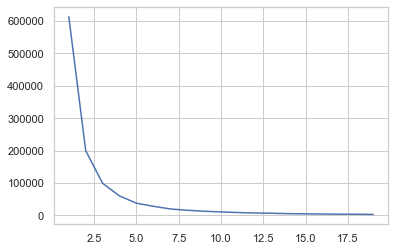

In [39]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(clx)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++')
yPred = kmeans.fit_predict(clx)
print('yPred : ', yPred)

yPred :  [2 1 0 1 2 1 1 0 0 2 1 1 2 2 1 0 2 2 2 2 1 2 2 1 0 1 1 2 1 2 1 1 2 0 2 1 0
 0 2 1 1 1 1 1 0 0 1 0 1 1 2 1 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 2 1 1 2 1 1 1
 1 1 2 1 2 2 2 1 1 1 2 0 0 2 1 1 2 1 2 1 1 0 1 1 0 2 2 1 1 1 0 2 1 2 2 2 2
 1 0 2 0 1 1 2 1 1 2 1 2 1 1 1 0 1 1 2 1 2 2 0 0 0 1 1 1 0 1 2 1 2 1 2 2 1
 2 1 2 1 1 0 1 2 2 1 2 1 2 0 2 1 2 2 2 0 1 0 1 1 1 2 2 2 1 1 1 2 0 0 1 0 1
 2 0 2 2 0 1 2 1 2 0 2 1 1 1 0 2 2 2 1 2 1 0 0 0 0 1 1 1 2 2 2 0 2 2 2 1 2
 1 1 1 2 2 2 0 0 0 1 2 2 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 2 0 1 2 2 1 1 1 1 2
 2 0 0 2 2 2 2 1 2 0 2 0 2 2 2 1 1 0 2 1 2 1 0 2 0 2 2 2 0 2 0 2 0 1 1 1 1
 1 0 2 0 0 2 1 2 1 2 2 1 1 2 1 1 1 0 2 1 0 0 0 1 2 2 1 2 1 1 2 1 1 2 2 1 1
 0 1 1 1 1 1 2 2 2 1 2 1 1 0 2 2 0 1 2 1 0 1 2 2 1 0 2 2 1 0 1 2 2 2 2 1 2
 1 2 2 1 1 2 0 0 0 2 1 1 1 2 1 2 2 1 1 0 1 2 1 2 1 1 1 2 1 2 1 1 2 1 2 2 1
 1 1 2 2 1 1 0 2 2 2 2 2 2 1 2 2 2 0 2 1 1 2 0 1 0 1 1 1 2 0 1 1 0 0 2 1 1
 1 1 0 2 1 2 1 2 1 1 1 0 2 2 1 2 1 2 2 2 1 1 2 2 2 2 1 1 1 1 1 2 2 1 2 1 1
 1 0 0 2 0 0 2 1

In [41]:
# 0번째 컬럼 즉 glucose 값들 중에서 클러스터링 분류 값이 0인 분류
print('Cluster-1 clx[yPred == 0, 0]', clx[yPred == 0, 0])
glucose0 = clx[yPred == 0, 0]
len(glucose0)

Cluster-1 clx[yPred == 0, 0] [183 168 166 196 158 180 171 159 176 150 187 163 151 171 160 162 173 170
 154 156 188 152 151 179 194 159 158 196 162 184 179 151 158 162 171 181
 179 164 184 193 155 191 161 161 151 150 161 155 182 194 152 157 179 165
 152 178 165 196 189 158 156 166 158 193 168 197 151 184 181 189 154 158
 173 194 166 195 154 180 163 186 187 164 189 198 154 151 176 188 173 150
 181 152 174 168 167 179 162 199 167 154 165 195 156 162 158 169 168 164
 158 187 173 149 175 174 153 187 162 154 190 170]


120

In [42]:
# 0번째 컬럼 즉 glucose 값들 중에서 클러스터링 분류 값이 1인 분류
print('Cluster-2 clx[yPred == 1, 0]', clx[yPred == 1, 0])
glucose1 = clx[yPred == 1, 0]
len(glucose1)

Cluster-2 clx[yPred == 1, 0] [ 85  89  78 110 107 103  99  97 109  88  92 103 102  90 106  71 103 103
 101  88  73 100 105  44  99 109 109  95 100  79  62  95  83 101 110 106
 100 107  80  81  92  71  93  81  85  96  83  95  89  76  78  97  99 107
 105  84  96 100  93 105 106 108 108  57 106  90  99 109  88 102 100 104
 110 102  79  75  85  87  73 109  85 105 107 109 108  99 103  96  81 109
  85 100  87 101  79  74 104  91  91 106  90  86  92  95  96 102 101 108
  71 106 100 106 104 108 108  96 108  78 107  77  80 106 109  99 102 105
  87 106  95  95  95  99  92  61  90  90  88 103  99 101  81  84 105  98
  87  93 107 105 109  90 105 100 100  96  82  95  72 101 102  97  83  94
 102  95  89  80  90  97 107  83 108 100  95 104  82  91 100  86  71  74
  88  74  97 105  85  84  99  83  89  99 110  81  84  94  96  75  84  84
  91  91  99  76  68  87  97 107  86  77 105  57 100  90  84  88  84  88
  84  97 110 103  85  87  99  91  95  99  92  78  98 108 109 100  93 103
  67  89 109 108  92 1

297

In [43]:
# 0번째 컬럼 즉 glucose 값들 중에서 클러스터링 분류 값이 2인 분류
print('Cluster-3 clx[yPred == 2, 0]', clx[yPred == 2, 0])
glucose2 = clx[yPred == 2, 0]
len(glucose2)

Cluster-3 clx[yPred == 2, 0] [148 116 118 115 126 119 143 125 147 145 117 122 138 111 133 146 133 141
 114 146 139 126 129 112 113 137 123 134 142 144 122 125 126 144 146 124
 111 113 120 118 117 122 125 129 128 147 136 114 114 131 148 120 111 134
 143 130 119 141 128 139 111 123 148 113 138 111 147 140 112 125 112 142
 117 142 134 122 139 119 146 122 124 111 129 113 111 114 142 123 128 122
 114 146 129 133 136 119 128 128 146 126 112 144 115 120 137 128 124 113
 112 115 129 112 124 112 122 115 130 122 126 139 137 125 146 147 124 133
 122 140 125 119 116 144 131 116 131 137 136 123 115 112 143 143 138 144
 129 119 115 135 139 140 147 117 117 120 134 135 148 120 115 124 144 137
 119 136 114 137 114 126 132 123 135 125 117 130 120 139 145 125 129 124
 130 125 116 117 111 122 127 129 128 131 116 114 124 125 121 130 111 143
 119 118 133 121 143 111 112 132 123 124 124 111 138 117 112 112 125 132
 128 114 111 128 128 147 136 117 123 120 120 127 145 115 112 111 121 125
 129 130 140 144 121 1

268

In [44]:
# 1번째 컬럼 즉 outcome 값들 중에서 클러스터링 분류 값이 0인 분류
print('clx[yPred == 0, 1]', clx[yPred == 0, 1])
outcome0 = clx[yPred == 0, 1]
len(outcome0)

clx[yPred == 0, 1] [1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1]


120

In [45]:
# 1번째 컬럼 즉 outcome 값들 중에서 클러스터링 분류 값이 1인 분류
print('clx[yPred == 1, 1]', clx[yPred == 1, 1])
outcome1 = clx[yPred == 1, 1]
len(outcome1)

clx[yPred == 1, 1] [0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0]


297

In [46]:
# 1번째 컬럼 즉 outcome 값들 중에서 클러스터링 분류 값이 2인 분류
print('clx[yPred == 2, 1]', clx[yPred == 2, 1])
outcome2 = clx[yPred == 2, 1]
len(outcome2)


clx[yPred == 2, 1] [1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 1]


268

우선 표만 보았을땐 Glucose가 높을수록 Outcome이 1인 집단이 많아 보입니다.

Text(0, 0.5, 'Outcome')

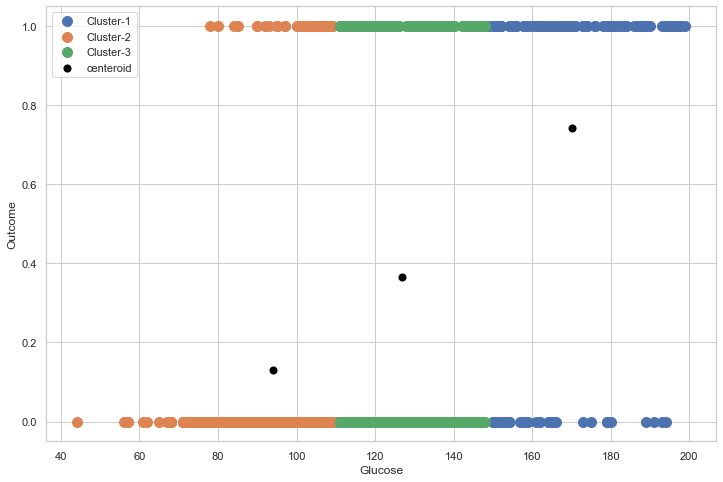

In [47]:
plt.figure(figsize=(12, 8))
plt.scatter(glucose0, outcome0, label='Cluster-1', s=100)
plt.scatter(glucose1, outcome1, label='Cluster-2', s=100)
plt.scatter(glucose2, outcome2, label='Cluster-3', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=50,
            c='black',
            label='centeroid')
plt.legend()
plt.xlabel(glucose)
plt.ylabel(outcome)

glucose의 평균과 각 집단의 총 갯수를 한번 찍어봅니다.

In [48]:
print('Cluster-1 glucose avg is : ' + str(np.mean(np.array(glucose0))) + ", and length " + str(len(outcome0)))
print('Cluster-2 glucose avg is : ' + str(np.mean(np.array(glucose1))) + ", and length " + str(len(outcome1)))
print('Cluster-3 glucose avg is : ' + str(np.mean(np.array(glucose2))) + ", and length " + str(len(outcome2)))

Cluster-1 glucose avg is : 170.15833333333333, and length 120
Cluster-2 glucose avg is : 94.05387205387206, and length 297
Cluster-3 glucose avg is : 126.86194029850746, and length 268


In [49]:
cluster0Column = [glucose, outcome]
cluster0 = pd.concat(
    [pd.DataFrame(glucose0, columns=[glucose]), pd.DataFrame(outcome0, columns=[outcome])], axis=1)
print(cluster0)
cluster1Column = [glucose, outcome]
cluster1 = pd.concat(
    [pd.DataFrame(glucose1, columns=[glucose]), pd.DataFrame(outcome1, columns=[outcome])], axis=1)
print(cluster1)
cluster2Column = [glucose, outcome]
cluster2 = pd.concat(
    [pd.DataFrame(glucose2, columns=[glucose]), pd.DataFrame(outcome2, columns=[outcome])], axis=1)
print(cluster2)

     Glucose  Outcome
0        183        1
1        168        1
2        166        1
3        196        1
4        158        1
..       ...      ...
115      187        1
116      162        1
117      154        1
118      190        1
119      170        1

[120 rows x 2 columns]
     Glucose  Outcome
0         85        0
1         89        0
2         78        1
3        110        0
4        107        1
..       ...      ...
292      106        0
293       88        0
294       89        0
295      101        0
296       93        0

[297 rows x 2 columns]
     Glucose  Outcome
0        148        1
1        116        0
2        118        1
3        115        1
4        126        0
..       ...      ...
263      137        0
264      123        1
265      122        0
266      121        0
267      126        1

[268 rows x 2 columns]


각 집단에서 당뇨병 걸린 사람의 퍼센트를 보았을때
glucose가 높은 집단이 퍼센트가 높은것을 확인할 수 있습니다.

이렇게 확인 후 특정 의미있는 집단만 추출하여 학습을 하여도 되겠습니다.

In [50]:
c0idx0 = cluster0[cluster0[outcome] == 0].index
c0idx1 = cluster0[cluster0[outcome] == 1].index
c1idx0 = cluster1[cluster1[outcome] == 0].index
c1idx1 = cluster1[cluster1[outcome] == 1].index
c2idx0 = cluster2[cluster2[outcome] == 0].index
c2idx1 = cluster2[cluster2[outcome] == 1].index
print('len(c0idx0)', len(c0idx0))
print('cluster1 집단에서 당뇨병 걸린 사람의 수 ', len(c0idx1))
print('cluster0Column', len(cluster0))
print('cluster1 집단에서 당뇨병 걸린 사람의 퍼센트 ', len(c0idx1) / len(cluster0))
print('len(c1idx0)', len(c1idx0))
print('cluster2 집단에서 당뇨병 걸린 사람의 수 ', len(c1idx1))
print('cluster0Column', len(cluster1))
print('cluster2 집단에서 당뇨병 걸린 사람의 퍼센트 ', len(c1idx1) / len(cluster1))
print('len(c2idx0)', len(c2idx0))
print('cluster3 집단에서 당뇨병 걸린 사람의 수 ', len(c2idx1))
print('cluster0Column', len(cluster2))
print('cluster3 집단에서 당뇨병 걸린 사람의 퍼센트 ', len(c2idx1) / len(cluster2))


len(c0idx0) 31
cluster1 집단에서 당뇨병 걸린 사람의 수  89
cluster0Column 120
cluster1 집단에서 당뇨병 걸린 사람의 퍼센트  0.7416666666666667
len(c1idx0) 258
cluster2 집단에서 당뇨병 걸린 사람의 수  39
cluster0Column 297
cluster2 집단에서 당뇨병 걸린 사람의 퍼센트  0.13131313131313133
len(c2idx0) 170
cluster3 집단에서 당뇨병 걸린 사람의 수  98
cluster0Column 268
cluster3 집단에서 당뇨병 걸린 사람의 퍼센트  0.3656716417910448


AgglomerativeClustering모델로 한번 더 클러스터링을 해주고 확인해봅니다.

Text(0, 0.5, 'Outcome')

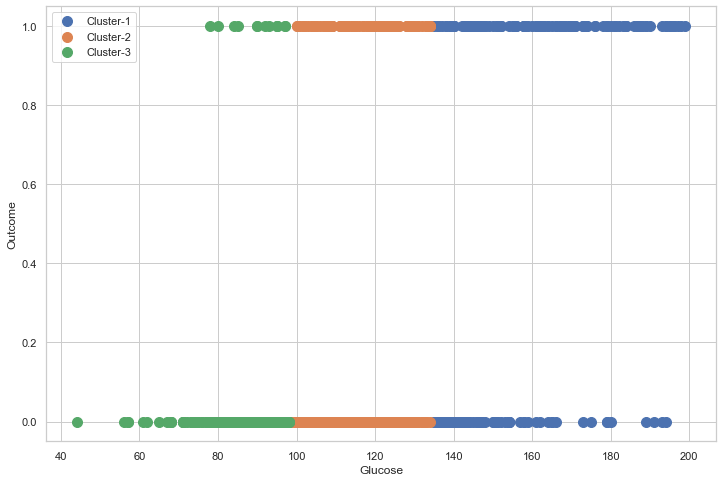

In [51]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
yPred = ac.fit_predict(clx)

#visualizing clusters
plt.figure(figsize=(12, 8))
plt.scatter(clx[yPred == 0, 0], clx[yPred == 0, 1], label='Cluster-1', s=100)
plt.scatter(clx[yPred == 1, 0], clx[yPred == 1, 1], label='Cluster-2', s=100)
plt.scatter(clx[yPred == 2, 0], clx[yPred == 2, 1], label='Cluster-3', s=100)
plt.legend()
plt.xlabel(glucose)
plt.ylabel(outcome)

데이터에서 X와 y를 분리 시킵니다

#- Scaling -
스케일링은 예를들어 집값의 범위는 100억~천만원 단위인데 BMI 값은 18~30이라 모델링할때 수치가 큰쪽으로 치우쳐
모델링이 잘 안되는것을 방지하기위해 설정한 범위 내의 값으로 변환 시켜줍니다. scaling model로는 StandardScaler를 씁니다.

fit_transform()은 fit() 과 transform() 함께 수행하는 메소드 입니다.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "Outcome"]
y = df.loc[:, df.columns == "Outcome"]

scaler = StandardScaler()

xScaled = scaler.fit_transform(X)
print(xScaled[:, :6])

[[ 0.66061758  0.92841713 -0.02993305  0.92300628 -0.80623795  0.2178694 ]
 [-0.86714421 -1.17720833 -0.52203239  0.53252189 -0.80623795 -0.84922332]
 [ 1.27172229  2.09820906 -0.6860655  -1.35481931 -0.80623795 -1.35228131]
 ...
 [ 0.35506522  0.02600622 -0.02993305  0.14203751  0.43617107 -0.91020004]
 [-0.86714421  0.19311935 -1.01413173 -1.35481931 -0.80623795 -0.31567696]
 [-0.86714421 -0.90982732 -0.19396616  0.66268336 -0.80623795 -0.26994441]]


# 3. 모델링

이제 모델 학습에 들어 갑니다.

사용할 모델입니다.
 - LogisticRegression
 - RandomForest
 - DecisionTree
 - SVM

#- GridSearchCV -
GridSearchCV는 최적의 파라미터를 찾아주고 교차검증도 해줍니다.
여기서 파라미터란 모델에서 bias 값 즉 예측할때 가장 적합한 값을 찾아준다고 보면됩니다.
y = wX+b 에서 b값이라고 보면됩니다.

#- SMOTE -
y의 값이 불균형적이라 1의 값을 늘리고 0의 값을 줄이고 하는 복합적으로 불균형을 균형있게
맞출 수 있도록 SMOTE를 씁니다. SMOTE는 데이터를 늘리고 줄여서 데이터를 변화시키기 때문에
반드시 train 데이터셋에만 적용합니다. test값은 실제로 테스트해봐야하기 때문에 그데로 보존
하여야 합니다.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def fitClasifiers(gs_clfs, X, y):
    for clf in gs_clfs:
        print(X.shape)
        clf.fit(X, y)

def showGridsearchResult(gs_clfs):
    estimators = []
    scores = []
    params = []

    for clf in gs_clfs:
        estimators.append(str(clf.estimator))
        scores.append(clf.best_score_)
        params.append(clf.best_params_)

    for i, val in enumerate(estimators):
        print(val)
        print(scores[i])
        print(params[i])


xTrain, xTest, yTrain, yTest = train_test_split(xScaled, y, test_size=0.2, stratify=y)

lr = LogisticRegression()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# 혹시나 아래의 에러가 뜬다면
# ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty
# 아래의 코드처럼 penalty에 l2만 써주면 해결됩니다.
paramLr = {"penalty": ["l2"]}

#"linear", "poly", "rbf", "sigmoid" 에서 최적의 것을 찾아라는 의미입니다.
paramSvc = {"kernel": ["linear", "poly", "rbf", "sigmoid"]}

# max_depth는 파라미터를 3~6 사이로 최적의 값을 찾아라는 의미입니다.
paramTree = {"max_depth": [3, 4, 5, 6], "min_samples_split": [2, 3]}


# cv는 cross validation의 약자로 만약에 5로 설정하면 데이터가 100개 있다고 가정할때 20, 20, 20, 20, 20
# 씩 나누어 1~4번까지는 train data로 쓰고 나머지 5번은 test data로 씁니다.
# 이렇게 각 test data를 5번 돌리게 되므로 작은 데이터를 학습할때 좀 더 정확한 예측을 할 수 있습니다.
gsLr = GridSearchCV(lr, param_grid=paramLr, cv=5, refit=True)
gsSvc = GridSearchCV(svc, param_grid=paramSvc, cv=5, refit=True)
gsDt = GridSearchCV(dt, param_grid=paramTree, cv=5, refit=True)
gsRf = GridSearchCV(rf, param_grid=paramTree, cv=5, refit=True)

gsClfs = [gsLr, gsSvc, gsDt, gsRf]

# 혹시나 아래의 에러가 뜬다면
# DataConversionWarning: A column-vector y was passed when a 1d array was expected.
# Please change the shape of y to (n_samples,), for example using ravel().
# 아래의 코드처럼 y_train.values.ravel()으로 바꾸어 주면 해결됩니다.
fitClasifiers(gsClfs, xTrain, yTrain.values.ravel())
showGridsearchResult(gsClfs)

(548, 8)
(548, 8)
(548, 8)
(548, 8)
LogisticRegression()
0.7939449541284402
{'penalty': 'l2'}
SVC(probability=True)
0.7957798165137614
{'kernel': 'linear'}
DecisionTreeClassifier()
0.7629858215179317
{'max_depth': 5, 'min_samples_split': 3}
RandomForestClassifier()
0.7829691409507923
{'max_depth': 4, 'min_samples_split': 3}


5. 평가지표들 살펴보기
- l2 패널티를 준 로지스틱 회귀 모델에서
- 혼동 행렬, 정확도, 재현률, 정밀도, roc curve와 roc_auc score 등을 살펴보자
머신러닝 성능 평가 - ROC 커브 개념 정리 링크
https://losskatsu.github.io/machine-learning/stat-roc-curve/#%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80---roc-%EC%BB%A4%EB%B8%8C-%EA%B0%9C%EB%85%90-%EC%A0%95%EB%A6%AC

##################################
###### LogisticRegression ########
##################################
### GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2']}) showMetrics ###
[[85  7]
 [23 22]]
Acc : 0.781021897810219
precision : 0.7586206896551724
recall : 0.4888888888888889
### GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2']}) showPrecisionRecallCurve ###
th val : [0.06743043 0.06972877 0.07133808 0.07166777]
precision val : [0.39473684 0.38938053 0.39285714 0.3963964 ]
recalls val : [1.         0.97777778 0.97777778 0.97777778]


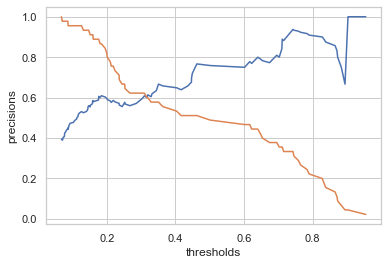

### GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2']}) showRocCurve ###
fpr val : [0.         0.         0.         0.01086957]
tpr val : [0.         0.02222222 0.04444444 0.04444444]
thresholds val : [1.95521811 0.95521811 0.90334133 0.89462555]


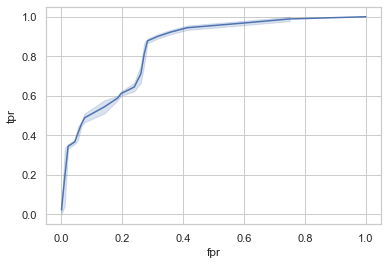

roc score : 0.844927536231884
 

 

##################################
######### RANDOM FOREST ##########
##################################
### GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3]}) showMetrics ###
[[87  5]
 [25 20]]
Acc : 0.781021897810219
precision : 0.8
recall : 0.4444444444444444
### GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3]}) showPrecisionRecallCurve ###
th val : [0.1401279  0.14067882 0.1453882  0.14890019]
precision val : [0.45454545 0.44897959 0.45360825 0.45833333]
recalls val : [1.         0.97777778 0.97777778 0.97777778]


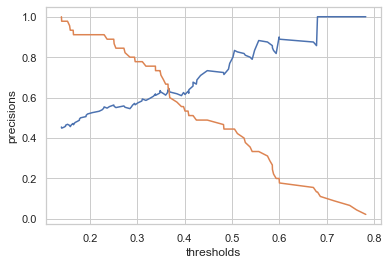

### GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3]}) showRocCurve ###
fpr val : [0.         0.         0.         0.01086957]
tpr val : [0.         0.02222222 0.13333333 0.13333333]
thresholds val : [1.78198719 0.78198719 0.6801258  0.67813035]


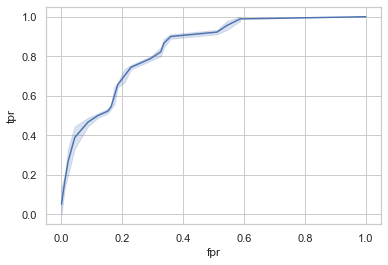

roc score : 0.841304347826087
 

 

##################################
######### DecisionTree ###########
##################################
### GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3]}) showMetrics ###
[[84  8]
 [27 18]]
Acc : 0.7445255474452555
precision : 0.6923076923076923
recall : 0.4
### GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3]}) showPrecisionRecallCurve ###
th val : [0.         0.04242424 0.07692308 0.13888889]
precision val : [0.32846715 0.33070866 0.47297297 0.47222222]
recalls val : [1.         0.93333333 0.77777778 0.75555556]


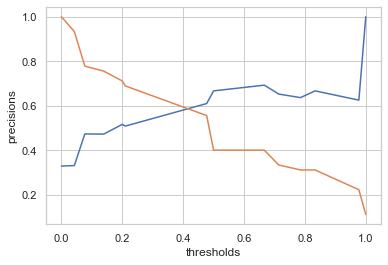

### GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3]}) showRocCurve ###
fpr val : [0.         0.         0.06521739 0.07608696]
tpr val : [0.         0.11111111 0.22222222 0.31111111]
thresholds val : [2.         1.         0.97727273 0.83333333]


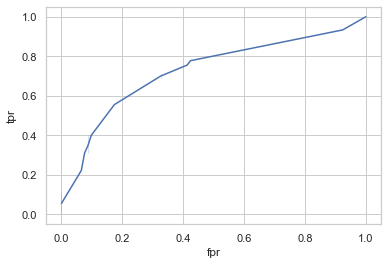

roc score : 0.7259661835748793


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score, precision_score, roc_curve
from sklearn.metrics import precision_recall_curve

def showMetrics(yTest, yPred):
    confusion = confusion_matrix(yTest, yPred)
    accuracy = accuracy_score(yTest, yPred)
    precision = precision_score(yTest, yPred)
    recall = recall_score(yTest, yPred)
    print(confusion)
    print("Acc : {}".format(accuracy))
    print("precision : {}".format(precision))
    print("recall : {}".format(recall))

# 아래와 같은 에러가 발생 한다면 패키지 버전 오류 때문에 그렇습니다.
# AttributeError: module 'seaborn' has no attribute 'lineplot'
# seaborn을 최신버전으로 업데이트 해줍니다.
def showPrecisionRecallCurve(yTest, probPositivePred):
    precisions, recalls, thresholds = precision_recall_curve(yTest, probPositivePred)
    print("th val : {}".format(thresholds[:4]))
    print("precision val : {}".format(precisions[:4]))
    print("recalls val : {}".format(recalls[:4]))

    df = {
        "thresholds": thresholds,
        "precisions": precisions[:-1],
        "recalls": recalls[:-1]
    }
    df = pd.DataFrame.from_dict(df)

    sns.lineplot(x="thresholds", y="precisions", data=df)
    sns.lineplot(x="thresholds", y="recalls", data=df)
    plt.show()

def showRocCurve(yTest, probPositivePred):
    fpr, tpr, thresholds = roc_curve(yTest, probPositivePred)
    print("fpr val : {}".format(fpr[:4]))
    print("tpr val : {}".format(tpr[:4]))
    print("thresholds val : {}".format(thresholds[:4]))

    df = {"threshold": thresholds, "fpr": fpr, "tpr": tpr}
    df = pd.DataFrame.from_dict(df)
    sns.lineplot(x="fpr", y="tpr", data=df)
    plt.show()

    rocScore = roc_auc_score(yTest, probPositivePred)
    print("roc score : " + str(rocScore))

def showPredictResults(model):
    yPred = model.predict(xTest)
    predProb = model.predict_proba(xTest)
    print("### "+str(model)+" showMetrics ###")
    showMetrics(yTest, yPred)

    yPred = np.concatenate([predProb, yPred.reshape(-1, 1)], axis=1)
    probPositivePred = yPred[:, 1]
    print("### "+str(model)+" showPrecisionRecallCurve ###")
    showPrecisionRecallCurve(yTest, probPositivePred)

    print("### "+str(model)+" showRocCurve ###")
    showRocCurve(yTest, probPositivePred)

print('##################################')
print('###### LogisticRegression ########')
print('##################################')

showPredictResults(gsLr)

print(' \n')
print(' \n')


print('##################################')
print('######### RANDOM FOREST ##########')
print('##################################')
showPredictResults(gsRf)

print(' \n')
print(' \n')

print('##################################')
print('######### DecisionTree ###########')
print('##################################')
showPredictResults(gsDt)

### showMetrics ###
[[79 10]
 [24 33]]
Acc : 0.7671232876712328
precision : 0.7674418604651163
recall : 0.5789473684210527

# 위의 결과에서
    0   1
 0  79  10
 1  23  33

79 + 10 + 23 + 33 = 145 (test data 총 갯수 )

79: TN(true negative) / 실제 값이 0(negative)인데 0이라고 맞춘 갯수
10 : FN(false negative) / 실제 값이 0(negative)인데 1이라고 틀린 갯수
23: FP(false positive) / 실제 값이 1(positive)인데 0이라고 틀린 갯수
33 : TP(true positive) / 실제 값이 1(positive)인데 1이라고 맞춘 갯수

Acc는 전체 145개에서 79+33 맞춘 퍼센테이지이고
precision은 TP/(FP+TP)이며 33/(23+33) 입니다.
헬스케어 데이터에서는 질병이 걸렸느냐 안걸렸느냐, 이번 데이터에서는 30일 이내에 재방문 했느냐 안했느냐가 중요합니다.
따라서 1의 값을 얼마나 잘 맞추었냐가 더 중요합니다. 1의 값을 맞춘 비율이 precision입니다.

Acc로 판단했을때의 위험요소는 만약 1000개의 데이터에서 900개가 0이고 100개가 1일때(inbalance data)
1을 맞추지 않고 전부 0이라고 예측해버리면 90퍼센트의 정확도가 나오기 때문에 Acc로 판단하기는 위험합니다.

recall은 TP/(FN+TP)이며 1이라고 예측한 값이 10과 33이 있으며 이중에서 얼마나 질병이 걸렸는지
잘 예측했는지 보는 결과입니다.

#- showPrecisionRecallCurve -
th val : [0.04994261 0.06008972 0.0710064  0.07128134]
precision val : [0.44186047 0.4375     0.44094488 0.43650794]
recalls val : [1.         0.98245614 0.98245614 0.96491228]

* fpr : false positive rate
* tpr : true positive rate

precisions :
결론적으로 acc값보다 auc(roc_curve)값이 더 중요합니다.
thresholds를 만약 0.3으로 정했다면 예측값은 확률로 나오는데 만약 질병이 걸렸다고 예측하는 확률이
0.4라면 질병이 걸렸다고 1이라고 값을 반환한다. 즉 thresholds는 걸렸다 안걸렸다를 확실하게 구분해주는
기준치라고 보면됩니다.
그럼 thresholds가 1이라면 당연히 0.99의 확률로 병에 걸렸다고 예측하여도 0의 값이 나오는 것이다.
show_precision_recall_curve의 그래프 교차지점의 thresholds의 값이 가장 적합한 기준치라고 봐도됩니다.

roc_score이 결국 예측을 얼마나 잘 했느냐입니다.